expNumber= 0   a= 1.9356668129272296   b= 0.3094242161303071   chi2= 6.926115151520835
expNumber= 1   a= 2.031933470874771   b= 0.2995575510614889   chi2= 15.694235151520166
expNumber= 2   a= 2.076866785368062   b= 0.29449694790841646   chi2= 8.447202424246386
expNumber= 3   a= 1.837600153100049   b= 0.3269454271464425   chi2= 5.42558545455164
expNumber= 4   a= 1.9286001448691743   b= 0.30667270148385123   chi2= 3.8852763636418577
expNumber= 5   a= 1.8212668212275356   b= 0.3169151240576283   chi2= 11.714100606066845
expNumber= 6   a= 2.072400107388119   b= 0.28910907010217746   chi2= 5.510101818185437
expNumber= 7   a= 2.114400101291306   b= 0.29038179893069543   chi2= 6.757247272730352
expNumber= 8   a= 1.950066811270211   b= 0.30891512549579764   chi2= 5.248180606066207
expNumber= 9   a= 1.9208001317142647   b= 0.31389088483419275   chi2= 10.185061818186668
expNumber= 10   a= 1.9296001294421452   b= 0.3077817945974188   chi2= 10.452247272731833
expNumber= 11   a= 1.9070001579182527 

expNumber= 96   a= 2.0310668067708613   b= 0.29849694418520234   chi2= 6.983722424247837
expNumber= 97   a= 2.02420010680076   b= 0.29289088813135433   chi2= 6.36594181818552
expNumber= 98   a= 2.015133453413316   b= 0.3005211903169562   chi2= 8.8545587878827
expNumber= 99   a= 1.9319334678692495   b= 0.3157393699647875   chi2= 12.60308969697443
chi2all  [ 6.92611515 15.69423515  8.44720242  5.42558545  3.88527636 11.71410061
  5.51010182  6.75724727  5.24818061 10.18506182 10.45224727  4.41467636
  5.47742182 11.18056242  4.26997333 19.98430545  9.22455879  9.21056242
 12.20294061  4.70522061 11.33936242 16.76859515 15.61039515 11.13319515
  9.75282182  3.96211636  5.02940727 11.99518061 13.80076242 12.20326909
  9.1044497   4.42063879  6.16862061  8.59679879  6.46459879  5.71916727
  3.01166182  7.70675515  9.70298545  5.30982061  6.67500242  2.39317333
 10.49826182  4.06146182 16.62589333  7.71320242 10.56208727  3.93382182
 10.33558545  3.38088242 12.81908242 10.24190061  1.4345163

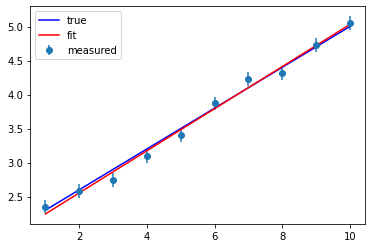

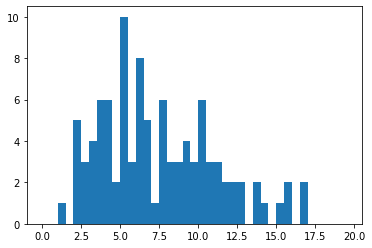

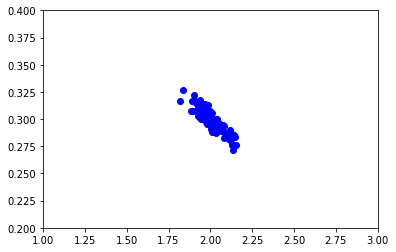

In [4]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import scipy.optimize as opt

"""
   main
     loop over experiments 
        readData
        do chi2 minimization (fit)
           plot data points and fit curve for 1st exp
     analyze fit results from n-experiment

Pysics model is y= 2.0 + 0.3*x
"""


def readData(expNumber):
   inFile='dataFiles/experiment'+str(expNumber)+'.txt'
   state=np.zeros((10,4),dtype=float)
   with open(inFile) as f:
      row=-1
      for line in f:
         row=row+1
         col=-1
         for number in line.split():
             col=col+1
             a=float(number)
             state[row,col]=a

   return state

def myChi2(param,state):
   a=param[0]
   b=param[1]
   x=state[:,0]
   ymeas=state[:,2]
   yerror=state[:,3]
   dy=ymeas-(a+b*x)
   cxx=0.0
   for i in np.arange(len(dy)):
      # print('i ',i)
      cxx=cxx+(dy[i]*dy[i])/(yerror[i]*yerror[i])
   """
   print('dy ',dy)
   print('yerror ',yerror)
   print('cxx   ',cxx)
   """

   return cxx

def analyzeOneExperiment(expNumber):
   state=readData(expNumber)
   # print state
   param=np.array([1.8,0.25])  # initial values for a and b
   #  find a and b that give the minimum chi2 for y=a+b*x
   result=opt.minimize(myChi2,param,args=(state,))
   # print result
   a=result.x[0]
   b=result.x[1]
   chi2=result.fun
   print('expNumber=',expNumber,'  a=',a,'  b=',b,'  chi2=',chi2)

   if expNumber==0:
      plt.figure(1)
      x=state[:,0]
      ytrue=state[:,1]
      ymeas=state[:,2]
      yerror=state[:,3]

      yfit=a+b*x

      plt.plot(x,ytrue,'b',label='true')
      plt.plot(x,yfit,'r',label='fit')
      plt.errorbar(x,ymeas,yerr=yerror,fmt='o',label='measured')
      plt.legend(loc='upper left')
      plt.savefig("analysisResult1.png")
      # plt.show()

   return result

def analyzeFitResult(Nexp):
   aa=np.zeros(Nexp)
   bb=np.zeros(Nexp)
   chi2all=np.zeros(Nexp)
   for i in range(Nexp):
      result=analyzeOneExperiment(i)
      a=result.x[0]
      b=result.x[1]
      chi2=result.fun
      #   save results in arrays for plotting
      aa[i]=a
      bb[i]=b
      chi2all[i]=chi2

   plt.figure(2)
   kwargs = dict(histtype='stepfilled', bins=np.arange(0.0,20.0,0.5))
   print('chi2all ',chi2all)
   plt.hist(chi2all, label='chi-square', **kwargs)
   plt.savefig("analysisResult2.png")

   plt.figure(3)
   plt.plot(aa,bb,'bo')
   plt.xlim(1.0,3.0)
   plt.ylim(0.2,0.4)

   plt.savefig("analysisResult3.png")
   plt.show()


def main():
#   main
#   analyze chi2 from 100 experiments
   nExperimentsToAnalyze=100
   analyzeFitResult(nExperimentsToAnalyze)

if __name__ == "__main__":
    main()